In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

In [ ]:
df = pd.read_csv('Spine_Data_Copy.csv')
df = df.dropna(how='all')  # getting rid of extra rows at bottom

Data Exploration

In [ ]:
df.describe()

,Case,Age (Y),Height (m),Weight (kg),BMI (kg/m^2)
count,55.000000,55.000000,55.000000,55.000000,55.000000
mean,13642.654545,64.709091,1.699055,77.041818,26.526258
std,1418.263874,11.689934,0.107290,16.394372,4.385745
min,10250.000000,33.000000,1.445000,42.700000,17.150267
25%,13634.000000,58.000000,1.624000,66.450000,22.941259
50%,14078.000000,68.000000,1.702000,77.300000,26.912646
75%,14640.500000,73.500000,1.775000,88.250000,29.810314
max,15094.000000,82.000000,1.938000,107.200000,34.804912


In [ ]:
df.isnull()

,Case,Age (Y),Sex,Height (m),Weight (kg),BMI (kg/m^2),Primary cancer,Vertebrae with Lesions,Vertebrae with Majority Lesions,Blastic,Lytic,Mixed,Comments/Fractures
0,False,False,False,False,False,False,False,False,False,True,True,False,False
1,False,False,False,False,False,False,False,False,False,True,True,True,True
2,False,False,False,False,False,False,False,False,False,True,True,False,True
3,False,False,False,False,False,False,False,False,False,True,False,True,False
4,False,False,False,False,False,False,False,False,False,False,True,True,False
5,False,False,False,False,False,False,False,False,False,False,True,True,False
6,False,False,False,False,False,False,False,False,False,True,False,True,False
7,False,False,False,False,False,False,False,False,False,True,False,True,True
8,False,False,False,False,False,False,False,False,False,False,True,True,False
9,False,False,False,False,False,False,False,False,False,True,True,True,True


In [ ]:
df.shape

(55, 13)

In [ ]:
df.isnull().sum()

,0
Case,0
Age (Y),0
Sex,0
Height (m),0
Weight (kg),0
BMI (kg/m^2),0
Primary cancer,0
Vertebrae with Lesions,0
Vertebrae with Majority Lesions,0
Blastic,34


<Figure size 1200x800 with 0 Axes>

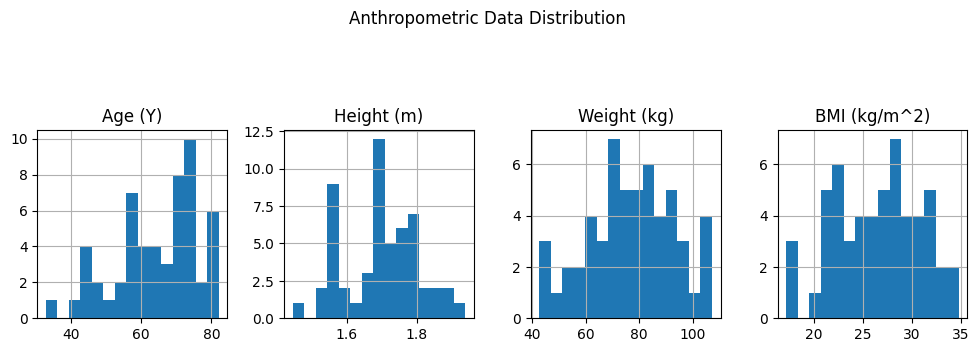

In [ ]:
plt.figure(figsize=(12, 8))

selected = df.drop(columns=['Case'])
selected.hist(bins=15, figsize=(12, 12), layout=(4, 4))
plt.suptitle('Anthropometric Data Distribution')
plt.show()

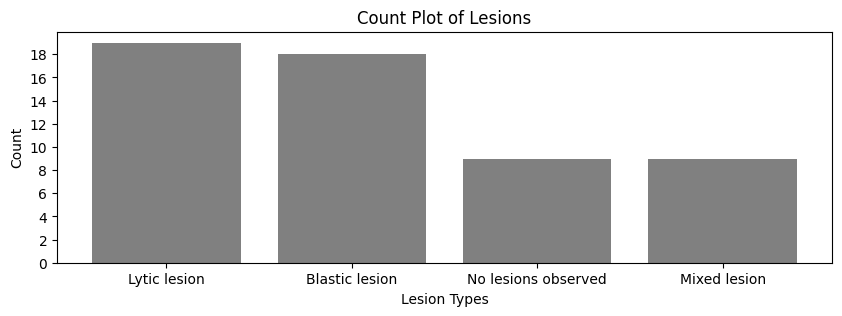

In [ ]:
count = df['Vertebrae with Majority Lesions'].value_counts()

plt.figure(figsize=(10, 3))
plt.bar(count.index, count, color='gray')
plt.title('Count Plot of Lesions')
plt.xlabel('Lesion Types')
plt.ylabel('Count')
plt.yticks(np.arange(0, max(count) + 1, 2))  # Adjust the step size if needed
plt.show()

In [ ]:
print(count)

Vertebrae with Majority Lesions
Lytic lesion           19
Blastic lesion         18
No lesions observed     9
Mixed lesion            9
Name: count, dtype: int64


In [ ]:
#renaming columns
df = df.rename(columns={"Vertebrae with Majority Lesions": "Majority Lesions", "Age (Y)": "Age", "Height (m)": "Height", "Weight (kg)": "Weight", "BMI (kg/m^2)": "BMI"})

Encoding Categorical Features

In [ ]:
categorical_columns_X = ['Sex', 'Primary cancer']  # Adjust as needed
df_encoded = pd.get_dummies(df, columns=categorical_columns_X)

#convert from boolean to int for Primary Cancer and Sex
encoded_columns = [col for col in df_encoded.columns if any(cat in col for cat in categorical_columns_X)]
df_encoded[encoded_columns] = df_encoded[encoded_columns].astype(int)

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
label_encoder = LabelEncoder()
df_encoded['Majority Lesions'] = label_encoder.fit_transform(df['Majority Lesions'])

In [ ]:
df = df_encoded.drop(columns=['Blastic', 'Lytic', 'Mixed', 'Comments/Fractures', 'Vertebrae with Lesions'])

In [ ]:
df

,Case,Age,Height,Weight,BMI,Majority Lesions,Sex_F,Sex_M,Primary cancer_Bile Ducts,Primary cancer_Breast,...,Primary cancer_Colon,Primary cancer_Lung,Primary cancer_Neuro,Primary cancer_Prostate,Primary cancer_Renal,Primary cancer_Skeletal,Primary cancer_Skin,Primary cancer_Soft Tissue Sarcoma,Primary cancer_Urothelial,Primary cancer_Uterus
0,10250.0,68.0,1.609,44.4,17.150267,2,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,10352.0,65.0,1.788,103.8,32.468507,3,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
2,10355.0,76.0,1.575,56.7,22.857143,2,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
3,10456.0,81.0,1.702,93.8,32.380513,1,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
4,10458.0,60.0,1.712,97.7,33.333970,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
5,10543.0,75.0,1.721,62.4,21.067978,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
6,11084.0,82.0,1.755,87.5,28.408860,1,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
7,11471.0,52.0,1.575,77.6,31.282439,1,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
8,12196.0,71.0,1.772,77.3,24.617960,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
9,12459.0,69.0,1.676,90.1,32.075746,3,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0


In [ ]:
#Splitting the data
X = df.drop(columns=['Majority Lesions'])
Y = df['Majority Lesions']

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=2)

In [ ]:
#Scaling the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#applying LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis(n_components = 3)
X_train_lda = lda.fit_transform(X_train_scaled, Y_train)
X_test_lda = lda.transform(X_test_scaled)

Applying Decision Tree Classifier with Randomized Grid Search Hyperparamter tuning

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
D_tree = DecisionTreeClassifier(random_state=100)

param_dist = {
    "max_depth": [3, 5, 7, 10],
    "min_samples_leaf": [1, 5, 10],
}

random_search = RandomizedSearchCV(
    estimator=D_tree,
    param_distributions=param_dist,
    n_iter=10,
    cv=3,
    scoring="accuracy",
    random_state=100
)

random_search.fit(X_train_scaled, Y_train)

print("Best Parameters:", random_search.best_params_)

best_model = random_search.best_estimator_
Y_pred_dt = best_model.predict(X_test_scaled)


Best Parameters: {'min_samples_leaf': 1, 'max_depth': 7}


In [ ]:
accuracy_dt = accuracy_score(Y_test, Y_pred_dt)
print(f"Decision Tree Classifier Test Accuracy: {accuracy_dt:.2f}")

print("\nClassification Report:")
print(classification_report(Y_test, Y_pred_dt, target_names=["Blastic lesion", "Lytic lesion", "Mixed lesion", "No Lesion observed"]))

Decision Tree Classifier Test Accuracy: 0.24

Classification Report:
                    precision    recall  f1-score   support

    Blastic lesion       0.27      0.75      0.40         4
      Lytic lesion       0.00      0.00      0.00         4
      Mixed lesion       0.00      0.00      0.00         4
No Lesion observed       0.33      0.20      0.25         5

          accuracy                           0.24        17
         macro avg       0.15      0.24      0.16        17
      weighted avg       0.16      0.24      0.17        17



Applying Gaussian Naive Bayes Classifier

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
nb_model = GaussianNB()

nb_model.fit(X_train_scaled, Y_train)

Y_pred_nb = nb_model.predict(X_test_scaled)

In [ ]:
accuracy_nb = accuracy_score(Y_test, Y_pred_nb)
print(f"Naive Bayes Test Accuracy: {accuracy_nb:.2f}")

print("\nClassification Report:")
print(classification_report(Y_test, Y_pred_nb, target_names=["Blastic lesion", "Lytic lesion", "Mixed lesion", "No Lesion observed"]))

Naive Bayes Test Accuracy: 0.18

Classification Report:
                    precision    recall  f1-score   support

    Blastic lesion       0.00      0.00      0.00         4
      Lytic lesion       0.00      0.00      0.00         4
      Mixed lesion       0.14      0.50      0.22         4
No Lesion observed       1.00      0.20      0.33         5

          accuracy                           0.18        17
         macro avg       0.29      0.17      0.14        17
      weighted avg       0.33      0.18      0.15        17



In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
lr_model = LogisticRegression(random_state=100)

lr_model.fit(X_train_lda, Y_train)

y_pred_lr = lr_model.predict(X_test_lda)

In [ ]:
accuracy_lr = accuracy_score(Y_test, y_pred_lr)
print(f"Logistic Regression Test Accuracy: {accuracy_lr:.2f}")

print("\nClassification Report:")
print(classification_report(Y_test, y_pred_lr, target_names=["Blastic lesion", "Lytic lesion", "Mixed lesion", "No Lesion observed"]))

Logistic Regression Test Accuracy: 0.35

Classification Report:
                    precision    recall  f1-score   support

    Blastic lesion       0.30      0.75      0.43         4
      Lytic lesion       0.25      0.25      0.25         4
      Mixed lesion       1.00      0.25      0.40         4
No Lesion observed       0.50      0.20      0.29         5

          accuracy                           0.35        17
         macro avg       0.51      0.36      0.34        17
      weighted avg       0.51      0.35      0.34        17



Support Vector Classifier

In [ ]:
from sklearn.svm import SVC

In [ ]:
svm_model = SVC()

svm_model.fit(X_train_scaled, Y_train)

y_pred_svm = svm_model.predict(X_test_scaled)


In [ ]:
accuracy_svm = accuracy_score(Y_test, y_pred_svm)
print(f"SVM Test Accuracy: {accuracy_svm:.2f}")

print("\nClassification Report:")
print(classification_report(Y_test, y_pred_svm, target_names=["Blastic lesion", "Lytic lesion", "Mixed lesion", "No Lesion observed"]))

SVM Test Accuracy: 0.29

Classification Report:
                    precision    recall  f1-score   support

    Blastic lesion       0.29      1.00      0.44         4
      Lytic lesion       0.33      0.25      0.29         4
      Mixed lesion       0.00      0.00      0.00         4
No Lesion observed       0.00      0.00      0.00         5

          accuracy                           0.29        17
         macro avg       0.15      0.31      0.18        17
      weighted avg       0.15      0.29      0.17        17



Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
 rf_model = RandomForestClassifier(n_estimators = 100, random_state = 100, bootstrap = True)

 rf_model.fit(X_train_scaled, Y_train)

 y_pred_rf = rf_model.predict(X_test_scaled)

In [ ]:
accuracy_rf = accuracy_score(Y_test, y_pred_rf)
print(f"Random Forest Test Accuracy: {accuracy_rf:.2f}")

print("\nClassification Report:")
print(classification_report(Y_test, y_pred_rf, target_names=["Blastic lesion", "Lytic lesion", "Mixed lesion", "No Lesion observed"]))

Random Forest Test Accuracy: 0.35

Classification Report:
                    precision    recall  f1-score   support

    Blastic lesion       0.36      1.00      0.53         4
      Lytic lesion       0.33      0.50      0.40         4
      Mixed lesion       0.00      0.00      0.00         4
No Lesion observed       0.00      0.00      0.00         5

          accuracy                           0.35        17
         macro avg       0.17      0.38      0.23        17
      weighted avg       0.16      0.35      0.22        17



Gradient Boosting

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
gb_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=10, random_state=100)

gb_model.fit(X_train_scaled, Y_train)

y_pred_gb = gb_model.predict(X_test_scaled)

In [ ]:
accuracy_gb = accuracy_score(Y_test, y_pred_gb)
print(f"Gradient Boosting Test Accuracy: {accuracy_gb:.2f}")

print("\nClassification Report:")
print(classification_report(Y_test, y_pred_gb, target_names=["Blastic lesion", "Lytic lesion", "Mixed lesion", "No Lesion observed"]))

Gradient Boosting Test Accuracy: 0.29

Classification Report:
                    precision    recall  f1-score   support

    Blastic lesion       0.25      0.50      0.33         4
      Lytic lesion       0.25      0.25      0.25         4
      Mixed lesion       0.50      0.25      0.33         4
No Lesion observed       0.33      0.20      0.25         5

          accuracy                           0.29        17
         macro avg       0.33      0.30      0.29        17
      weighted avg       0.33      0.29      0.29        17



K-Nearest Neighbors

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import silhouette_score

knn_model = KNeighborsClassifier()
knn_model.fit(X_train_scaled, Y_train)

y_pred_knn = knn_model.predict(X_test_scaled)

In [ ]:
accuracy_knn = accuracy_score(Y_test, y_pred_knn)
print(f"KNN Accuracy: {accuracy_knn:.2f}")

silhouette = silhouette_score(X_test_scaled, y_pred_knn)
print(f"Silhouette Score: {silhouette:.2f}")

print("\nClassification Report:")
print(classification_report(Y_test, y_pred_knn, target_names=["Blastic lesion", "Lytic lesion", "Mixed lesion", "No Lesion observed"]))

KNN Accuracy: 0.35
Silhouette Score: 0.32

Classification Report:
                    precision    recall  f1-score   support

    Blastic lesion       0.27      0.75      0.40         4
      Lytic lesion       0.25      0.25      0.25         4
      Mixed lesion       1.00      0.25      0.40         4
No Lesion observed       1.00      0.20      0.33         5

          accuracy                           0.35        17
         macro avg       0.63      0.36      0.35        17
      weighted avg       0.65      0.35      0.35        17



XGBoost With Random Search

In [ ]:
import xgboost as xgb

xgb_model = xgb.XGBClassifier(random_state=100)

param_dist = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
}

random_search = RandomizedSearchCV(
    estimator=xgb_model,
    param_distributions=param_dist,
    n_iter=10,
    scoring='accuracy',
    cv=3,
    random_state=100,
)

random_search.fit(X_train, Y_train)

print("Best Hyperparameters:", random_search.best_params_)
best_xgb_model = random_search.best_estimator_

y_pred_xgb = best_xgb_model.predict(X_test)

Best Hyperparameters: {'n_estimators': 300, 'max_depth': 5, 'learning_rate': 0.2}


In [ ]:
accuracy_xgb = accuracy_score(Y_test, y_pred_xgb)
print(f"XGBoost Accuracy: {accuracy_xgb:.2f}")

print("\nClassification Report:")
print(classification_report(Y_test, y_pred_xgb, target_names=["Blastic lesion", "Lytic lesion", "Mixed lesion", "No Lesion observed"]))

XGBoost Accuracy: 0.29

Classification Report:
                    precision    recall  f1-score   support

    Blastic lesion       0.33      1.00      0.50         4
      Lytic lesion       0.00      0.00      0.00         4
      Mixed lesion       0.50      0.25      0.33         4
No Lesion observed       0.00      0.00      0.00         5

          accuracy                           0.29        17
         macro avg       0.21      0.31      0.21        17
      weighted avg       0.20      0.29      0.20        17



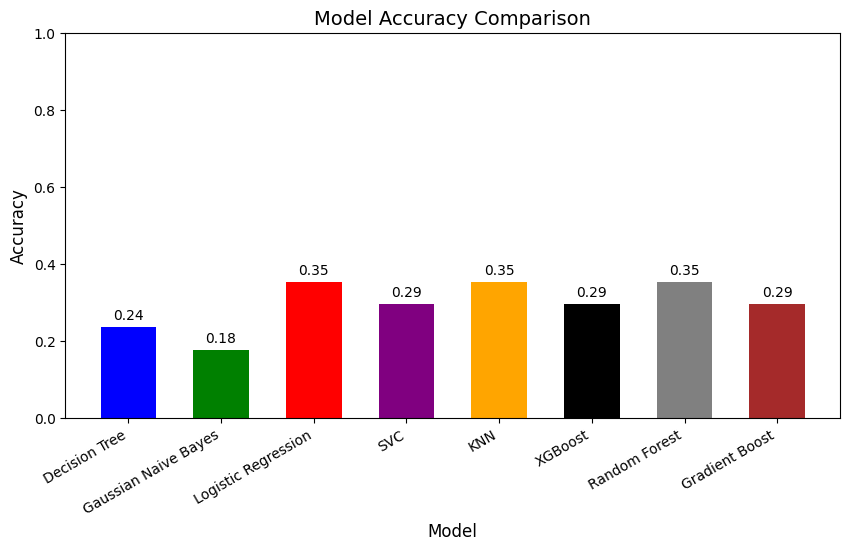

In [ ]:
import matplotlib.pyplot as plt

models = ["Decision Tree", "Gaussian Naive Bayes", "Logistic Regression", "SVC", "KNN", "XGBoost", "Random Forest", "Gradient Boost"]
accuracies = [accuracy_dt, accuracy_nb, accuracy_lr, accuracy_svm, accuracy_knn, accuracy_xgb, accuracy_rf, accuracy_gb]

plt.figure(figsize=(10, 5))

# Adjust bar width
bar_width = 0.6

# Ensure color list matches the number of models
colors = ['blue', 'green', 'red', 'purple', 'orange', 'black', 'gray', 'brown']

# Plot the bars
bars = plt.bar(models, accuracies, color=colors, width=bar_width)

# Labels and title
plt.xlabel('Model', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.title('Model Accuracy Comparison', fontsize=14)
plt.ylim(0, 1)

# Rotate labels properly and align
plt.xticks(rotation=30, ha='right', fontsize=10)

# Add accuracy values on top of bars
for bar, acc in zip(bars, accuracies):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.02, f"{acc:.2f}", ha='center', fontsize=10)

plt.show()
